<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/ch02_07_Seaborn%EC%8B%A4%EC%8A%B5_fmri%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.07. Seborn 실습 - fmri 데이터


---
* 날짜:
* 이름:

## 학습내용

    - pairplot을 이용해 모든 변수의 분포 및 관계를 시각화 한다.
    - relplot을 이용해 두 변수의 관계를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
fmri = sns.load_dataset('fmri')
fmri.head()
```

In [ ]:
fmri = sns.load_dataset('fmri')
fmri.head()
fmri[fmri['subject'] == 's13']

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
15,s13,17,stim,parietal,-0.008265
29,s13,16,stim,parietal,-0.002856
43,s13,15,stim,parietal,-0.010971
57,s13,14,stim,parietal,-0.033713
...,...,...,...,...,...
995,s13,1,cue,frontal,-0.010346
1016,s13,9,cue,frontal,-0.082955
1029,s13,8,cue,frontal,-0.070991
1040,s13,12,cue,frontal,-0.020686


#### | 데이터 기본 탐색

In [ ]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [ ]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [ ]:
fmri['subject'].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [ ]:
fmri.event.unique()

array(['stim', 'cue'], dtype=object)

In [ ]:
fmri.region.unique()

array(['parietal', 'frontal'], dtype=object)

### (2) Pair plot

```
seaborn.pairplot(data, *, 
                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶
```

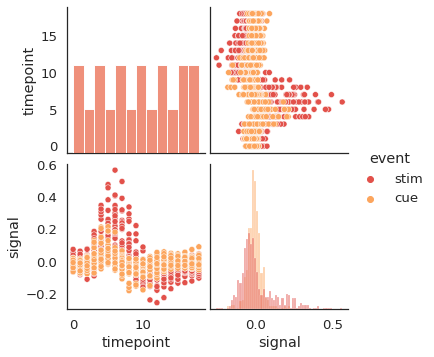

In [ ]:
sns.pairplot(fmri, # 수치자료형에 대해서만 상관플롯 및 분포를 그려준다. (범주형 자료는 안나온다. )
             hue = 'event', # event 컬럼 데이터에 따라 색 나누기
             diag_kind = 'hist') # 대각선의 분포플롯 종류 
plt.show()

### (3) Relational plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.relplot(x=None, y=None, 
                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)
```

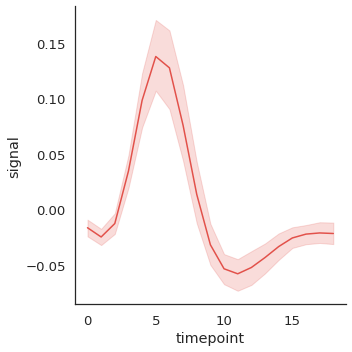

In [ ]:
sns.relplot(data = fmri, x ='timepoint' , y = 'signal' ,
            kind = 'line')

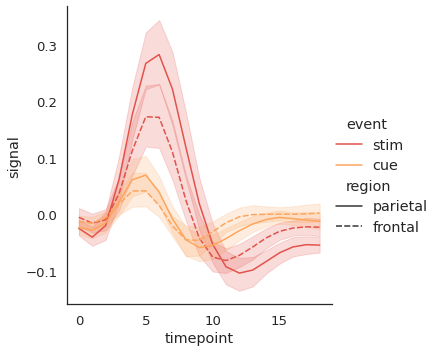

In [ ]:
sns.relplot(data = fmri, x ='timepoint' , y = 'signal' ,
            kind = 'line',
            hue = 'event',
            #size = 'region' # 뇌 영역별로 선 굵기 분류
            style = 'region' # 뇌 영역별로 선 스타일 분류
            )

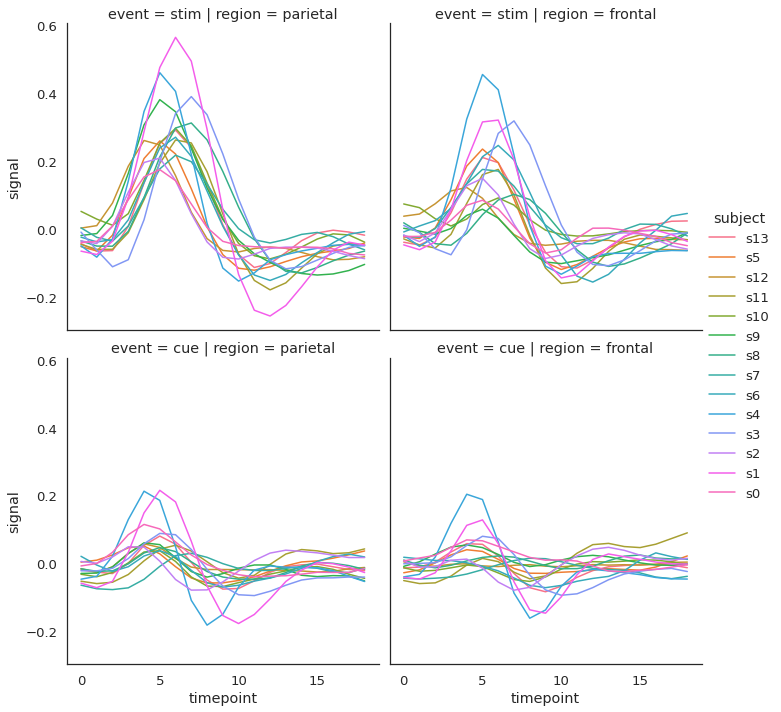

In [ ]:
# 실험자 별로 그래프 그리기
sns.relplot(data = fmri, x = 'timepoint', y = 'signal',
            kind = 'line',
            hue = 'subject',
            col = 'region', # 영역별로 플롯 따로 그리기
            row = 'event' # 이벤트별 플롯 따로 그리기 (새로운 행)
            )

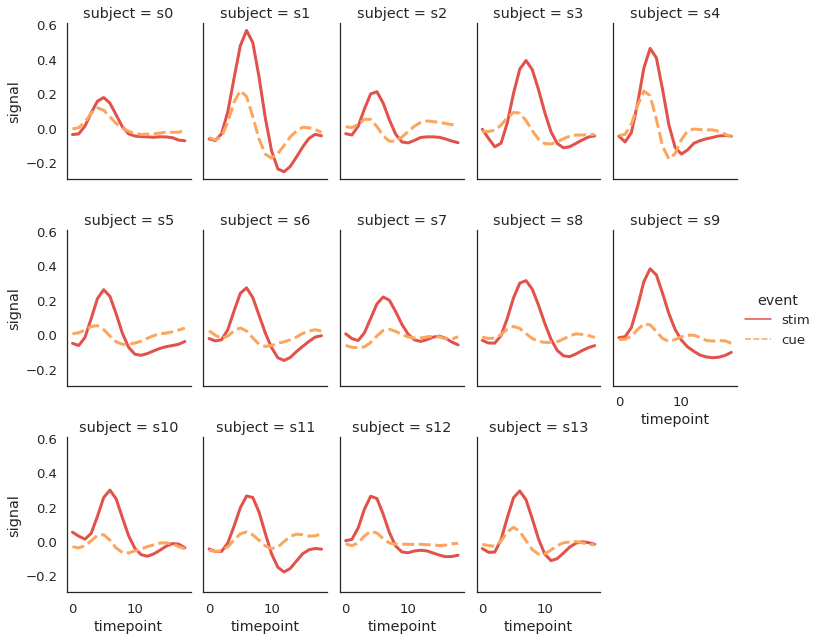

In [ ]:
# 참가자 별 별도의 플롯을 그려보자 
# region : frontal < parietal -> parietal만 사용하자. 
# stim :  자극이 있을 때 없을 때 비교 

# fmri_p = fmri[fmri['region'] =='parietal']
# -> .query 

fmri_p = fmri.query("region == 'parietal'")

sns.relplot(data = fmri_p, x = 'timepoint', y = 'signal',
            hue = 'event',
            kind = 'line',
            col = 'subject',
            col_order = [f's{i}' for i in range(14)], # 열 순서 지정 
            col_wrap = 5,# 열 개수 조정 
            aspect = .7,# 그림 가로 비율 조정 
            height = 3, # 그림 세로 사이즈 
            linewidth =  3, # 선 굵기 조정
            style = 'event', # 이벤트별 선 스타일 구분 
            )



## **과제: flights**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-03.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("flights")
```

In [ ]:
dff = sns.load_dataset("flights")
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### (2) Pair plot

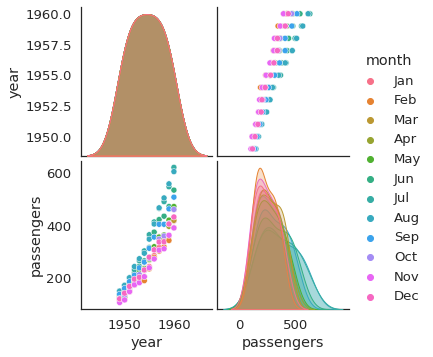

In [ ]:
sns.pairplot(dff, hue = 'month')

### (3) Relational plot

<Figure size 576x288 with 0 Axes>

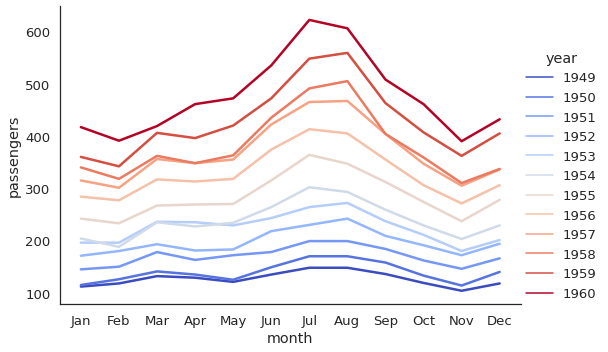

In [ ]:
plt.figure(figsize = (8,4))
sns.relplot(data = dff, x = 'month', y = 'passengers',
            hue = 'year',
            kind = 'line',
            legend = 'full',
            height = 5,
            aspect = 1.5,
            linewidth = 2.5,
            palette = 'coolwarm')

plt.show()


## **과제: [Response of neurons](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html)**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-02.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("dots")
```

#### | 데이터 기본 탐색


In [ ]:
dfn = sns.load_dataset('dots')
dfn.info()
print(dfn['align'].unique())
print(dfn['choice'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB
['dots' 'sacc']
['T1' 'T2']


In [ ]:
dfn.describe()

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


### (2) Pair plot

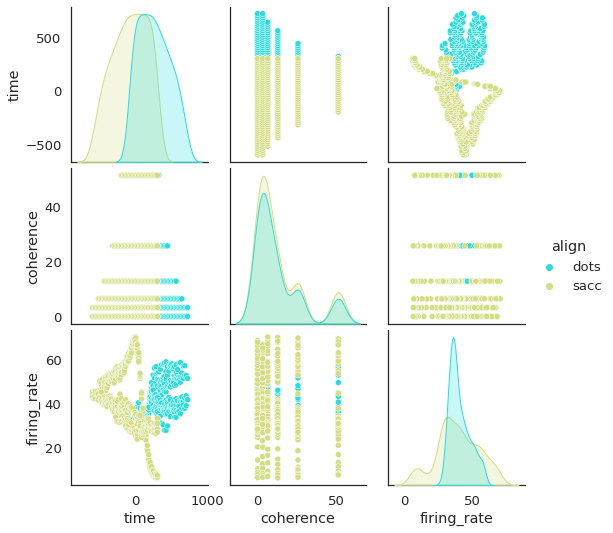

In [140]:
sns.pairplot(dfn, 
             hue = 'align',
             palette = 'rainbow')

### (3) Relational plot

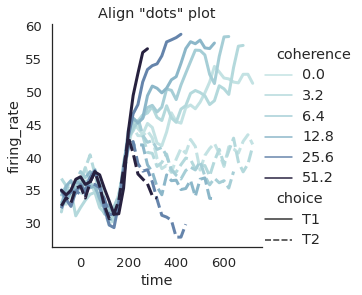

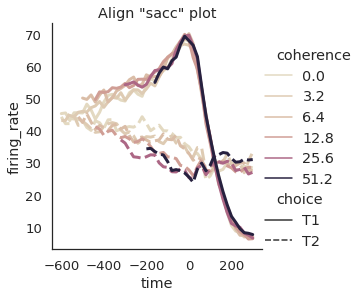

In [133]:
sns.relplot(data = dfn[dfn['align']=='dots'], x = 'time', y = 'firing_rate',
            kind = 'line', 
            hue = 'coherence',
            style = 'choice',
            linewidth = 3,
            palette = 'ch:start=.2,rot=-.3',
            height = 4)
plt.axis('tight')
plt.title('Align "dots" plot')

plt.show()
sns.relplot(data = dfn[dfn['align']=='sacc'], x = 'time', y = 'firing_rate',
            kind = 'line', 
            hue = 'coherence',
            style = 'choice',
            linewidth = 3,
            palette = 'ch:s=-.2,r=.6',
            height = 4)
plt.axis('tight')
plt.title('Align "sacc" plot')
plt.show()

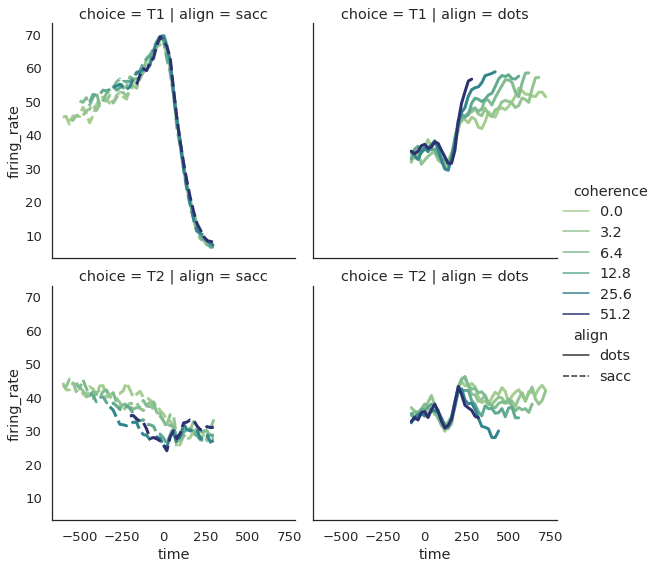

In [139]:
sns.relplot(data = dfn, x = 'time', y = 'firing_rate',
            kind = 'line', 
            hue = 'coherence',
            style = 'align',
            linewidth = 3,
            palette = 'crest',
            col = 'align',
            col_order=['sacc', 'dots'],
            row = 'choice',
           
            height = 4)
plt.axis('tight')
plt.show()
